In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd /content/drive/My Drive/Data Mining/H1N1 prediction project

/content/drive/My Drive/Data Mining/H1N1 prediction project


In [0]:
from pathlib import Path

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

pd.set_option("display.max_columns", 100)

In [20]:
!pip install catboost

In [21]:
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [0]:
from catboost import CatBoostClassifier
import category_encoders as ce

In [0]:
#changed
features_df = pd.read_csv(
    "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_set_labels.csv", 
    index_col="respondent_id"
)
test_features_df = pd.read_csv("test_set_features.csv", 
                               index_col="respondent_id")

In [0]:
encoder = ce.backward_difference.BackwardDifferenceEncoder(return_df=True)

In [27]:
features_df.mode()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo


In [30]:
print("features1_df.shape", features_df.shape)
features_df.head()


features1_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [29]:
print("features_df.shape", labels_df.shape)
labels_df.head()

features_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [0]:
frames = [features1_df, test_features_df]
features_df = pd.concat(frames)

In [0]:
features_df.shape

In [0]:
features_df.shape
features_df.head()

In [0]:
features_df = features_df.fillna(features_df.mode().iloc[0])

In [0]:
test_features_df = test_features_df.fillna(test_features_df.mode().iloc[0])

In [33]:
features_df.shape

(26707, 35)

In [34]:
encoder.fit(features_df)

BackwardDifferenceEncoder(cols=['age_group', 'education', 'race', 'sex',
                                'income_poverty', 'marital_status',
                                'rent_or_own', 'employment_status',
                                'hhs_geo_region', 'census_msa',
                                'employment_industry',
                                'employment_occupation'],
                          drop_invariant=False, handle_missing='value',
                          handle_unknown='value',
                          mapping=[{'col': 'age_group',
                                    'mapping':     age_group_0  age_group_1  age_group...
 9                  -0.086957                 -0.043478  
 10                 -0.086957                 -0.043478  
 11                 -0.086957                 -0.043478  
 12                 -0.086957                 -0.043478  
 13                 -0.086957                 -0.043478  
 14                 -0.086957                 -0.043478 

In [0]:
df1 = encoder.transform(features_df)

In [0]:
features1_df, test_features_df = df1[0:26707], df1[26707:]
features_df = features1_df

In [0]:
features_df.shape

In [35]:
test_features_df.shape

(26708, 35)

In [11]:
(labels_df["h1n1_vaccine"]
     .corr(labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144495

In [12]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [36]:
features_df.dtypes != "object"

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [0]:
categorical_var = np.where(features_df.dtypes != np.float)[0]

In [38]:
print(categorical_var)

[21 22 23 24 25 26 27 28 29 30 33 34]


In [0]:
estimators = MultiOutputClassifier(
    #estimator=LogisticRegression(penalty="l2", C=1)
    #estimator=RandomForestClassifier(random_state=1)
    #estimator=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
    #estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
    #estimator = svm.SVC()
    estimator = CatBoostClassifier(iterations=20000, task_type="GPU",devices='0:1')
    )

In [0]:
full_pipeline = Pipeline([
    ("estimators", estimators),
])

In [0]:
estimator1 = CatBoostClassifier(iterations=20000, task_type="GPU",devices='0:1',cat_features=categorical_var)
estimator2 = CatBoostClassifier(iterations=20000, task_type="GPU",devices='0:1',cat_features=categorical_var)

In [0]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.01,
    shuffle=True,
    stratify=labels_df,
    # random_state=RANDOM_SEED
)

In [42]:
X_train.shape

(26439, 35)

In [43]:
y_train["h1n1_vaccine"]

respondent_id
3124     0
4836     0
12376    0
22193    1
17665    0
        ..
21266    0
1343     0
23486    1
6147     0
8074     0
Name: h1n1_vaccine, Length: 26439, dtype: int64

In [0]:
estimator1.fit(X_train, y_train["h1n1_vaccine"])


# Predict on evaluation set
# This competition wants probabilities, not labels
preds1 = estimator1.predict_proba(X_eval)
preds1

Streaming output truncated to the last 5000 lines.
1164:	learn: 0.3879924	total: 1m 18s	remaining: 21m 14s
1165:	learn: 0.3879589	total: 1m 18s	remaining: 21m 14s
1166:	learn: 0.3879360	total: 1m 18s	remaining: 21m 14s
1167:	learn: 0.3879059	total: 1m 19s	remaining: 21m 14s
1168:	learn: 0.3878811	total: 1m 19s	remaining: 21m 14s
1169:	learn: 0.3878617	total: 1m 19s	remaining: 21m 14s
1170:	learn: 0.3878351	total: 1m 19s	remaining: 21m 14s
1171:	learn: 0.3878227	total: 1m 19s	remaining: 21m 14s
1172:	learn: 0.3878044	total: 1m 19s	remaining: 21m 14s
1173:	learn: 0.3877940	total: 1m 19s	remaining: 21m 13s
1174:	learn: 0.3877704	total: 1m 19s	remaining: 21m 13s
1175:	learn: 0.3877584	total: 1m 19s	remaining: 21m 13s
1176:	learn: 0.3877351	total: 1m 19s	remaining: 21m 13s
1177:	learn: 0.3877151	total: 1m 19s	remaining: 21m 13s
1178:	learn: 0.3876917	total: 1m 19s	remaining: 21m 13s
1179:	learn: 0.3876756	total: 1m 19s	remaining: 21m 13s
1180:	learn: 0.3876456	total: 1m 19s	remaining: 21m 1

In [0]:
estimator2.fit(X_train, y_train["seasonal_vaccine"])

In [0]:
preds2 = estimator2.predict_proba(X_eval)
preds2

In [88]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (268, 2)
test_probas[1].shape (268, 2)


In [89]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds1[:, 1],
        "seasonal_vaccine": preds2[:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()


y_preds.shape: (268, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
15564,0.139787,0.939881
1864,0.940517,0.981940
3131,0.633812,0.957792
4809,0.036476,0.052515
12931,0.077460,0.941059


In [0]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

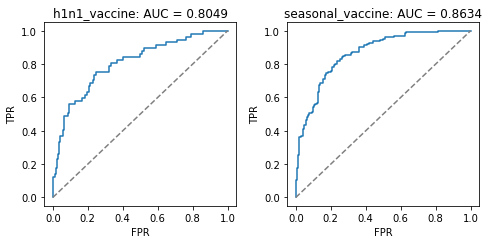

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [92]:
roc_auc_score(y_eval, y_preds)

0.8341897234718386